# **Algerian Forest Fire Dataset Cleaner**

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
import warnings
warnings.filterwarnings('ignore')

## Separating The Bejaia and Sidi-Bel Abbes Region datasets

In [68]:
with open('Algerian_forest_fires_dataset_UPDATE.csv', 'r') as f:
    lines = f.readlines()

In [69]:
start_idx = -1
for i, line in enumerate(lines):
    line = line.lower()
    if 'day' in line and 'month' in line and 'temperature' in line:
        start_idx = i
        break

In [70]:
split_idx = -1
for i, line in enumerate(lines):
    if 'Sidi' in line:
        split_idx = i
        break

In [71]:
df_bejaia = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=start_idx, nrows=split_idx - start_idx - 2)

df_sidi = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=split_idx+1)

## Analysing + Cleaning both Bejaia and Sidi df together

In [72]:
df_bejaia.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [73]:
df_bejaia.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire


In [74]:
df_sidi.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [75]:
print(f'Bejaia Shape: {df_bejaia.shape}\nSidi Shape: {df_sidi.shape}')

Bejaia Shape: (122, 14)
Sidi Shape: (122, 14)


In [76]:
df_bejaia.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [77]:
df_sidi.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

**Column Analysis:** _From the above it is clear that the columns in both df have a very bad space distribution_

In [78]:
list(df_bejaia.iloc[:,-1])

['not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',


In [79]:
list(df_sidi.iloc[:,-1])

['not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire     ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 nan,
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'not fire   ',
 'not fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fire   ',
 'fi

**Text Analysis:** _From the above it is clear that the Classes Column value in both df have a very bad space distribution_

### **Removing Spaces from Column Headers and Classes Column**

In [80]:
for df in [df_bejaia, df_sidi]:
    df.columns = df.columns.str.strip()
    df[:] = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Analyizing and Cleaning **Bejaia**

In [81]:
df_bejaia.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [82]:
df_bejaia.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire


In [83]:
df_bejaia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [84]:
df_bejaia.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [85]:
df_bejaia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [86]:
df_bejaia.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [87]:
# Adding a Region Column, might help when we view combined dataset
# 0 -> Bejaia Region
df_bejaia['Region'] = 0

In [88]:
df_bejaia['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

## Analysing and Cleaning **Sidi**

In [89]:
df_sidi.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [90]:
df_sidi.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
118,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
121,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [91]:
df_sidi.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,5.892623,17.903279
std,8.843274,1.115259,0.0,3.675608,15.716186,2.692186,1.486759,12.244064,12.995068,4.832913,13.878868
min,1.000000,6.000000,2012.0,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,0.100000,1.400000
25%,8.000000,7.000000,2012.0,30.000000,43.250000,14.000000,0.000000,77.650000,7.325000,1.825000,7.400000
50%,16.000000,7.500000,2012.0,34.000000,56.000000,15.000000,0.000000,84.850000,13.150000,4.600000,13.900000
75%,23.000000,8.000000,2012.0,36.000000,66.750000,16.750000,0.475000,89.275000,22.900000,8.625000,23.875000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,19.000000,68.000000


In [92]:
df_sidi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [93]:
df_sidi['DC'].unique()

array(['8.2', '7.8', '7.6', '15.4', '17.6', '26.3', '28.9', '7.4', '14.7',
       '22.5', '30.5', '37.8', '7.3', '8', '8.3', '18.4', '17', '25.6',
       '34.5', '43.3', '52.4', '36.7', '8.5', '17.8', '27.3', '36.8',
       '46.4', '45.1', '35.4', '9.7', '9.9', '9.5', '19.4', '10.4',
       '14.6 9', '24.1', '33.1', '42.3', '51.6', '61.1', '71', '80.6',
       '90.1', '99', '56.6', '15.9', '19.7', '28.3', '37.6', '47.2',
       '57.1', '67.2', '10.5', '21.4', '32.1', '42.7', '52.5', '9.1',
       '9.8', '20.2', '30.9', '46.3', '41.5', '55.5', '54.2', '65.1',
       '76.4', '86.8', '96.8', '107', '117.1', '127.5', '137.7', '147.7',
       '157.5', '167.2', '177.3', '166', '149.2', '159.1', '168.2',
       '16.3', '24.3', '26.6', '8.4', '17.7', '26.1', '16.6', '25.2',
       '33.4', '50.2', '59.2', '63.3', '77.8', '86', '88', '97.3',
       '106.3', '115.6', '28.1', '36.1', '44.5', '7.9', '15.2', '16.5'],
      dtype=object)

In [94]:
df_sidi[df_sidi['DC'] == '14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
43,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [95]:
df_sidi['FWI'].unique()

array(['0.2', '0.1', '1', '0.9', '3.1', '6', '0.8', '1.9', '10', '16.7',
       '12.9', '0.3', '0.6', '0.4', '4.9', '1.2', '5.3', '6.7', '9.5',
       '12', '18.4', '7.2', '2.2', '0.5', '6.4', '5.2', '9.9', '15',
       '6.3', '3', '1.3', '9.6', '4.7', 'fire', '14.1', '7.3', '7.7',
       '9.1', '13', '17.3', '30', '25.4', '16.3', '2.5', '0.7', '3.2',
       '9', '10.9', '13.2', '14.5', '13.5', '19.5', '20.9', '12.6', '5.9',
       '12.7', '10.7', '21.6', '18.8', '10.5', '15.7', '5.5', '14.8',
       '24', '26.3', '12.2', '18.1', '24.5', '26.9', '31.1', '30.3',
       '26.1', '6.1', '16', '19.4', '0', '2.7', '3.7', '3.9', '10.3',
       '5.7', '9.8', '19.3', '17.5', '15.4', '5.6', '3.8', '13.7', '15.2',
       '6.5'], dtype=object)

In [96]:
df_sidi[df_sidi['FWI'] == 'fire   ']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Since all the above problems are created by one row only and upon closer inspection, the error was of one missing comma between DC and ISI, which lead to DC value be 14.6 9 instead of 14.6, so therefore, I manually shifted all the values from DC to one place right and hence all problems will eventually vanish away. 

In [97]:
df_sidi.iloc[43,9] = '14.6'
df_sidi.iloc[43,10] = 9
df_sidi.iloc[43,11] = 12.5
df_sidi.iloc[43,12] = 10.4
df_sidi.iloc[43,13] = 'fire'

In [98]:
df_sidi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      122 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [99]:
columns = ['DC', 'FWI']
for col in columns:
    df_sidi[col] = pd.to_numeric(df_sidi[col], errors='coerce')

In [100]:
df_sidi.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [101]:
# 1 -> Sidi-Bel Abbes
df_sidi['Region'] = 1

In [102]:
df_sidi['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [103]:
df_sidi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
 14  Region       122 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 14.4+ KB


## Merging

In [104]:
df = pd.concat([df_bejaia, df_sidi], ignore_index=True)

In [105]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [106]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [107]:
df.shape

(244, 15)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [109]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [110]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [111]:
print('Unique Columns')
for col in df.columns:
    print(f'- {col}: {len(df[col].unique())}')

Unique Columns
- day: 31
- month: 4
- year: 1
- Temperature: 19
- RH: 62
- Ws: 18
- Rain: 39
- FFMC: 173
- DMC: 166
- DC: 198
- ISI: 106
- BUI: 173
- FWI: 126
- Classes: 2
- Region: 2


In [112]:
df.to_csv('CLEANED_Algerian_forest_fires_dataset_.csv', index=False)

## **Visualization**

In [113]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Naming Region

We are doing this because when giving to ml model, we tend to give numerical features instead of text and for EDA, names will be more useful.

In [114]:
df.iloc[:122,-1] = 'Bejaia'
df.iloc[122:,-1] = 'Sidi-Bel Abbes'

### Univariate Analysis

In [115]:
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

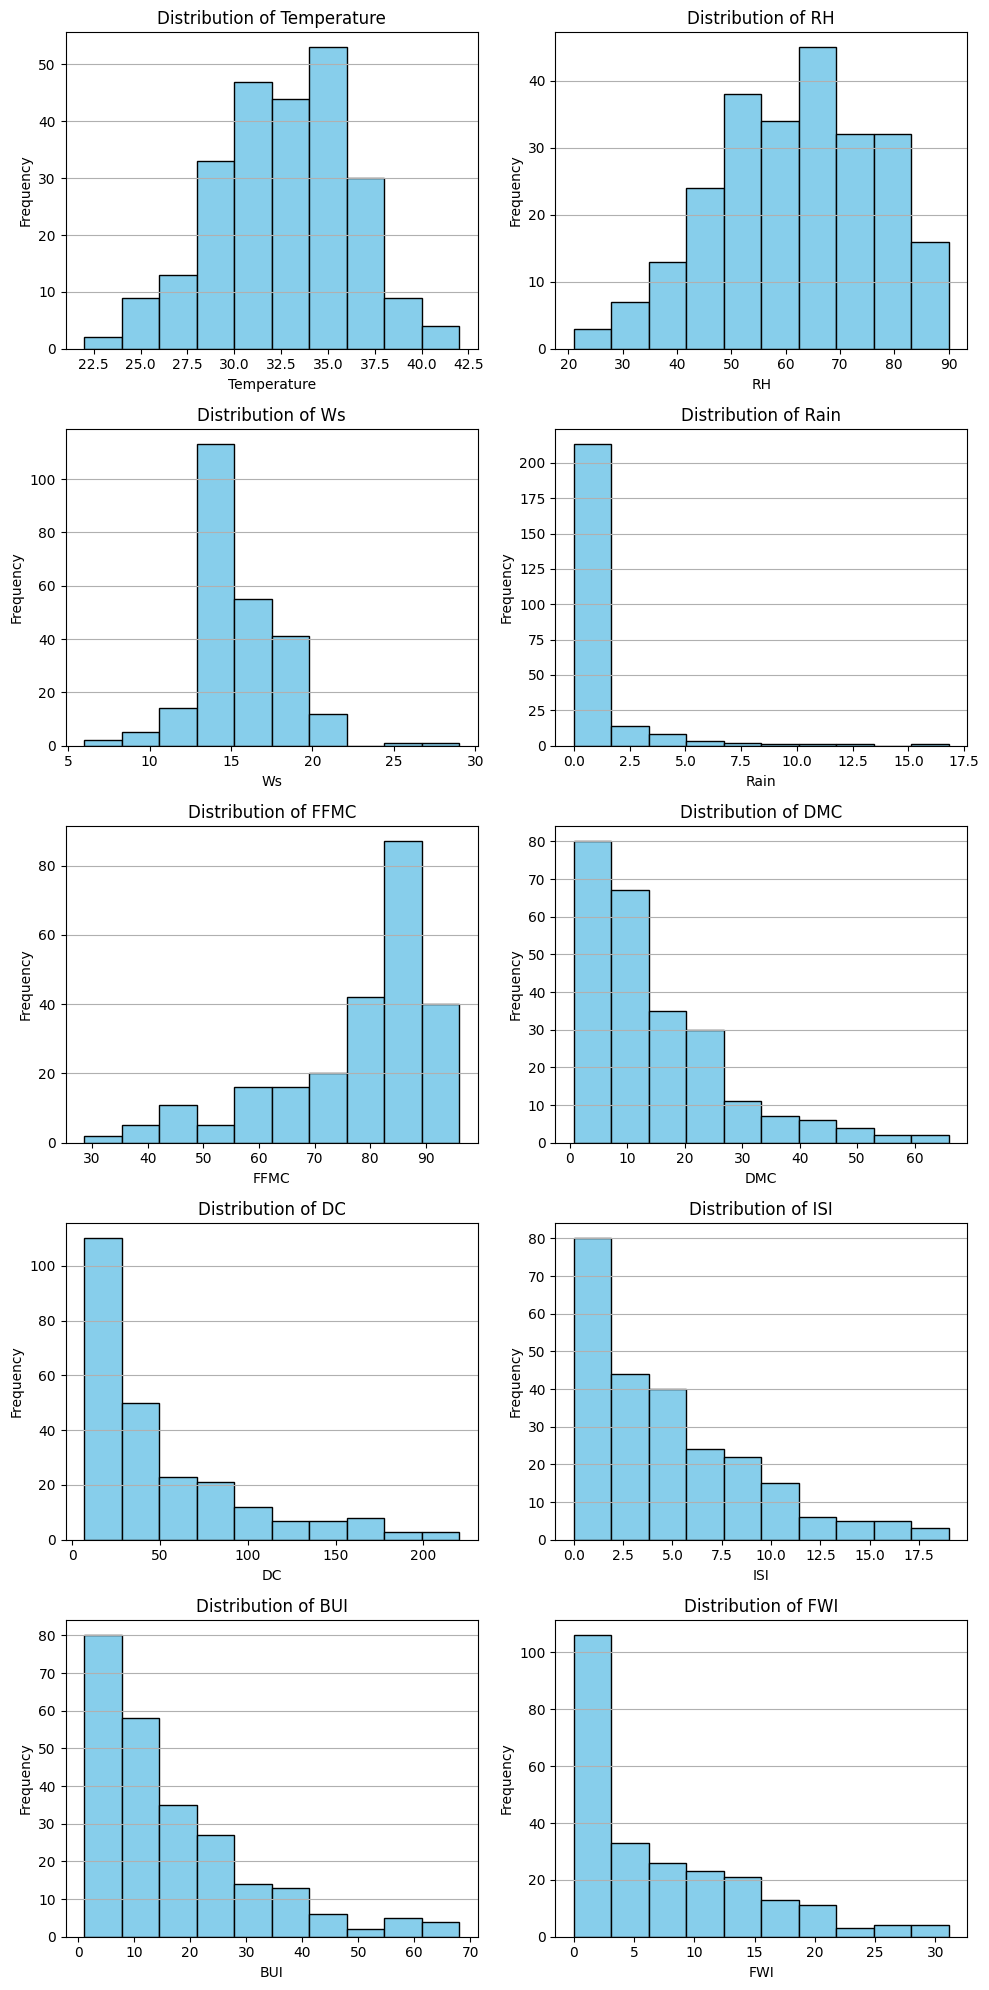

In [126]:
rows = (len(features) + 1) // 2  
fig, axes = plt.subplots(rows, 2, figsize=(10, rows * 4))  
axes = axes.flatten()  

for i, column in enumerate(features):
    axes[i].hist(df[column], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Target Variable Analysis

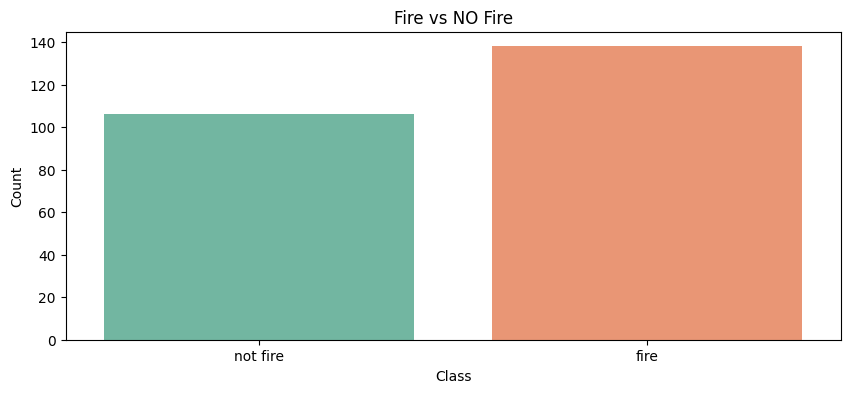

In [117]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Classes', palette='Set2')
plt.title('Fire vs NO Fire')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [118]:
df['Classes'].value_counts(normalize=True) * 100

Classes
fire        56.557377
not fire    43.442623
Name: proportion, dtype: float64

_Dataset is roughly balanced_

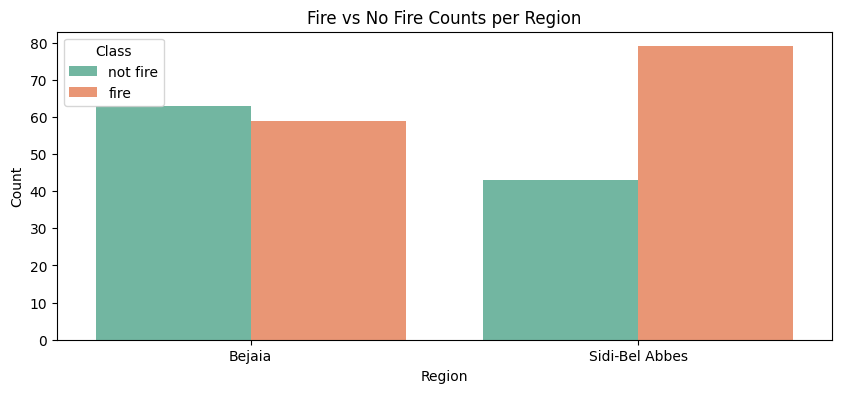

In [119]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Region', hue='Classes', palette='Set2')
plt.title("Fire vs No Fire Counts per Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Class")
plt.show()

_The overall dataset is balanced, but region-wise it’s skewed, especially for Sidi-Bel Abbes where fires dominate heavily._

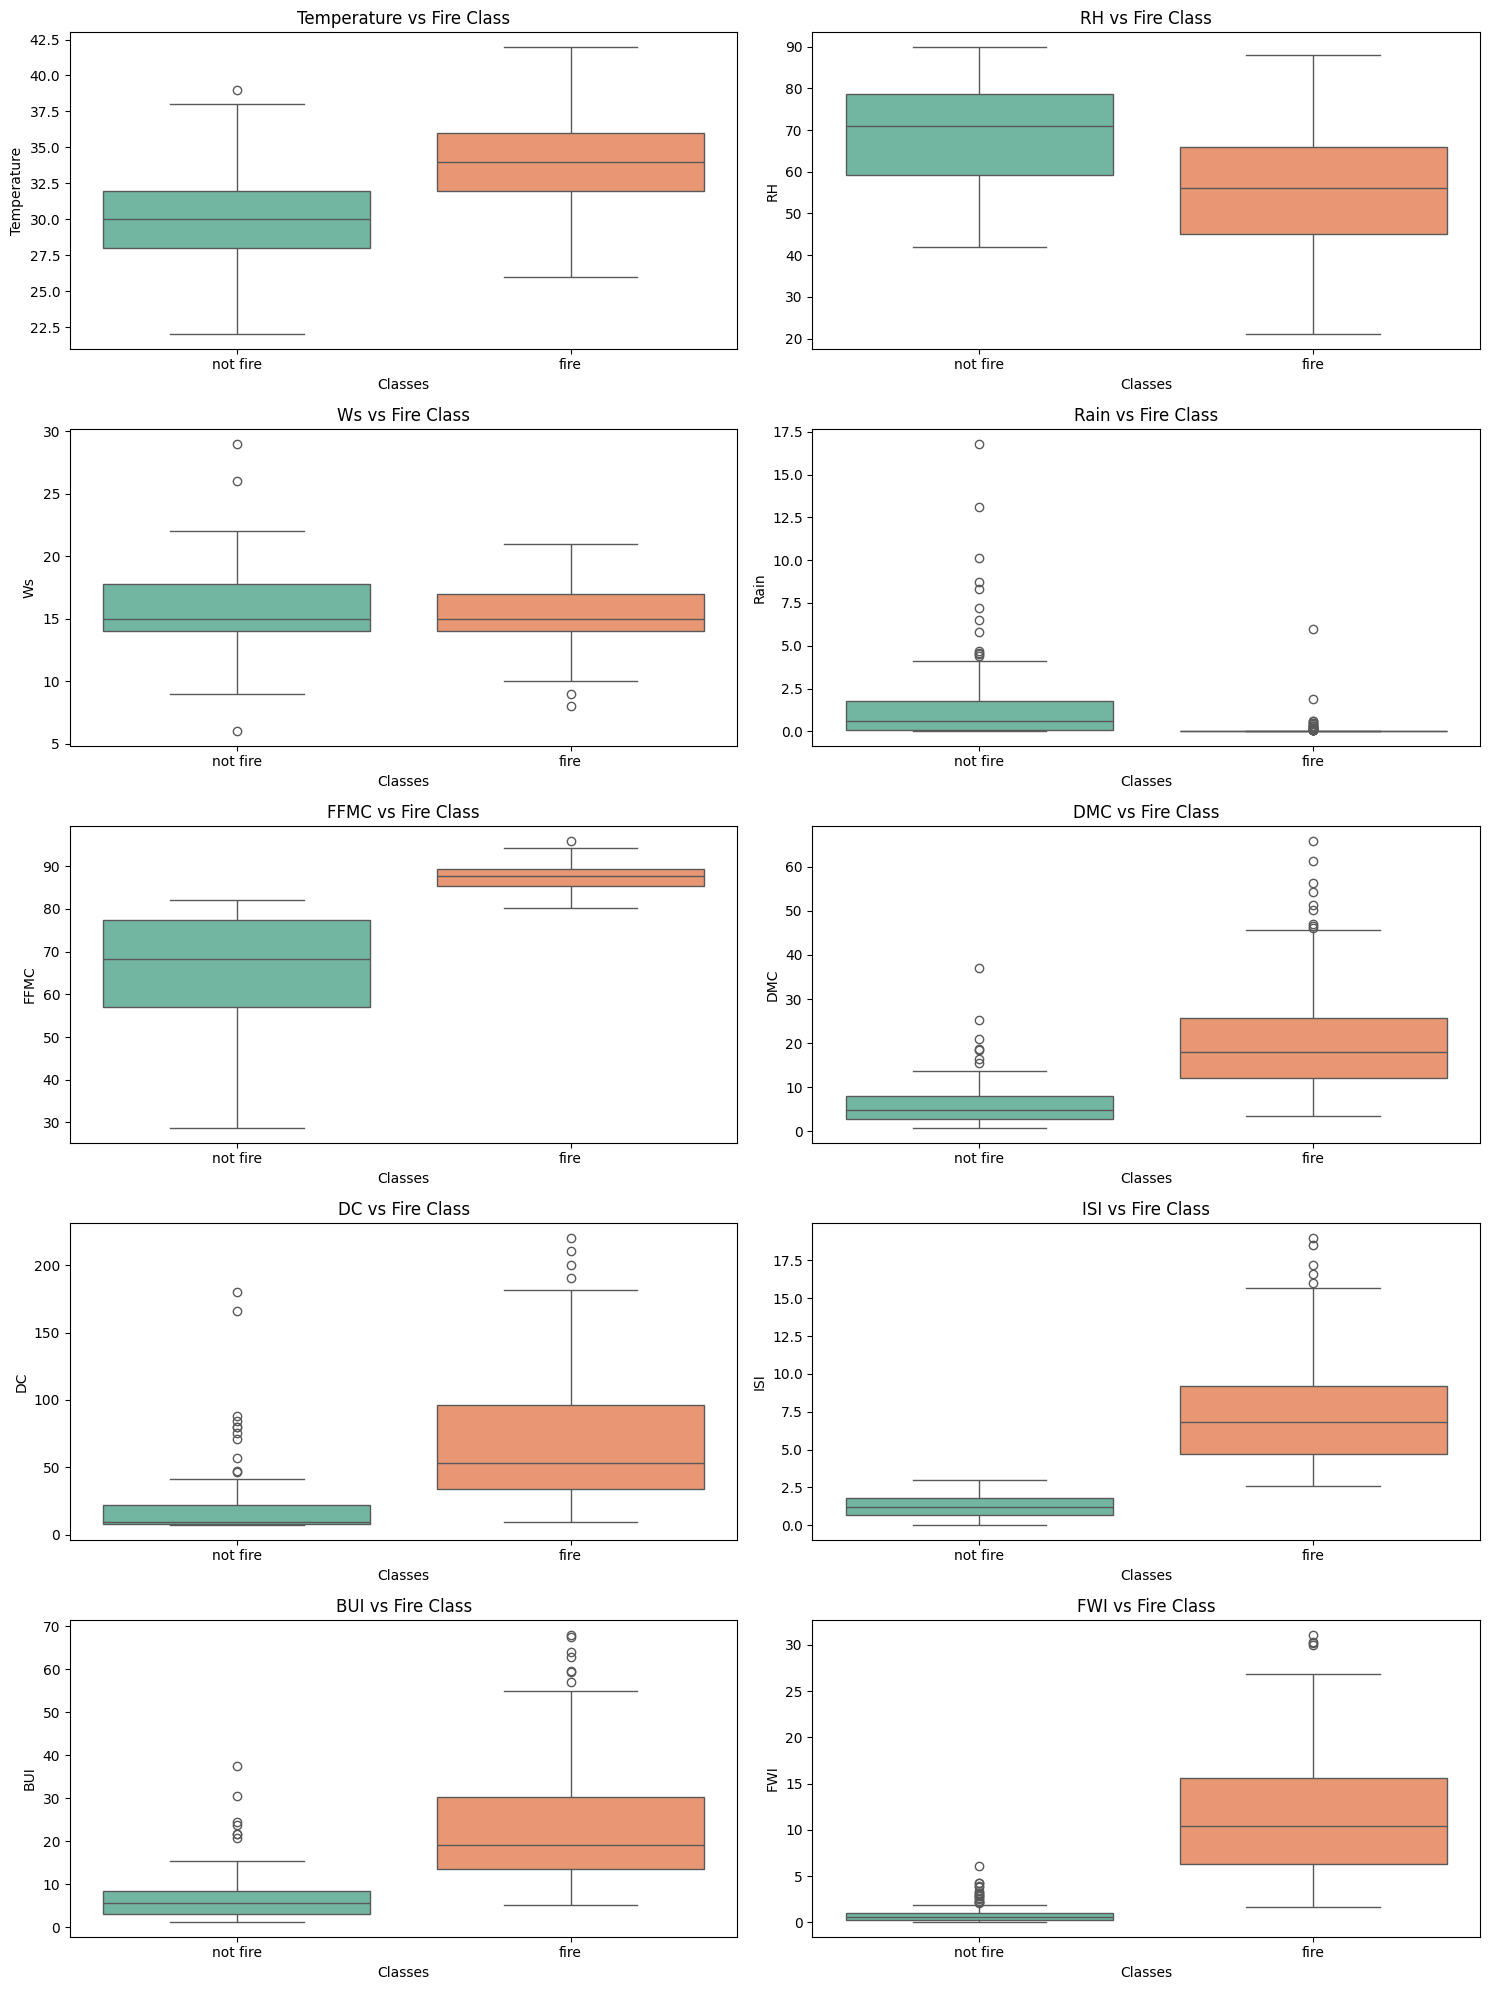

In [120]:
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()  

for i, col in enumerate(features):
    sns.boxplot(data=df, x='Classes', y=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f"{col} vs Fire Class", fontsize=12)
    axes[i].set_xlabel("Classes")
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Numerical Feature Correlation

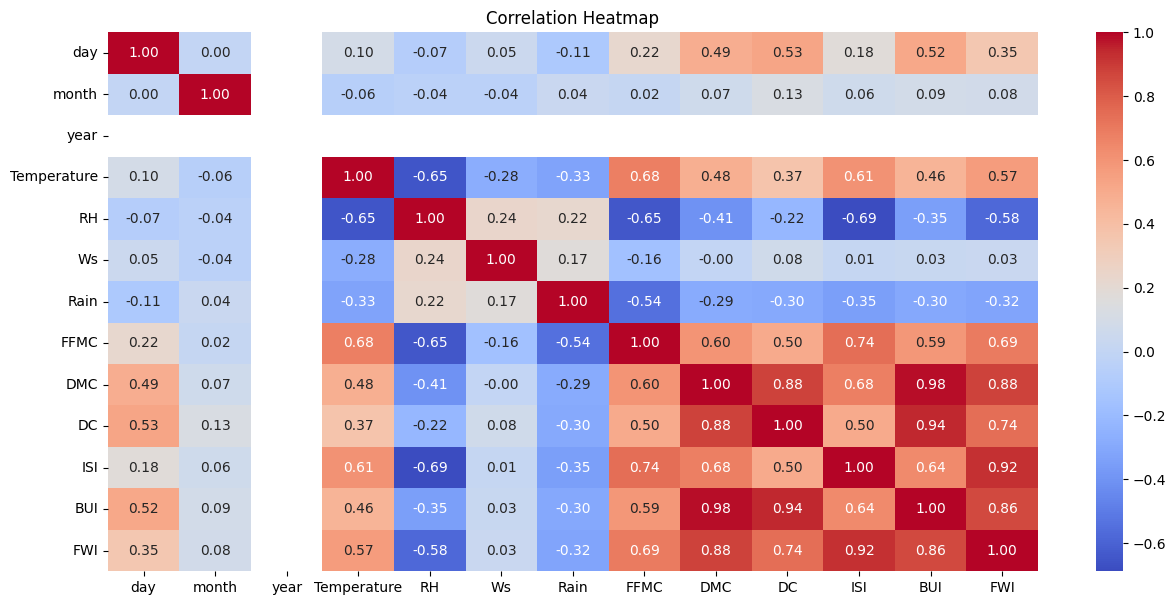

In [121]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Monthly Trends

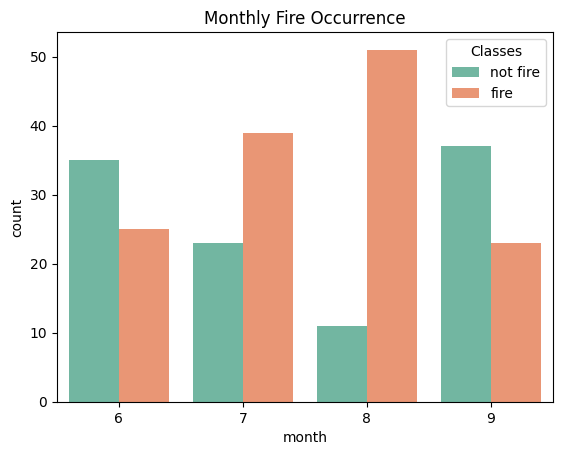

In [122]:
sns.countplot(data=df, x='month', hue='Classes', palette='Set2')
plt.title("Monthly Fire Occurrence")
plt.show()

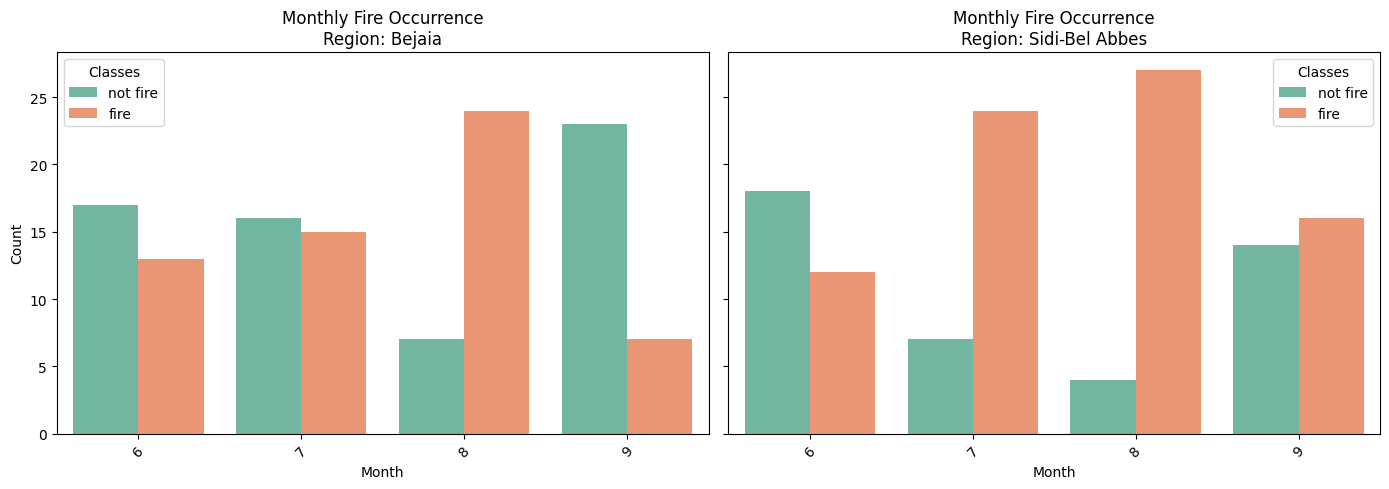

In [123]:
regions = df['Region'].unique()
fig, axes = plt.subplots(1, len(regions), figsize=(14, 5), sharey=True)

for ax, region in zip(axes, regions):
    sns.countplot(
        data=df[df['Region'] == region],
        x='month',
        hue='Classes',
        palette='Set2',
        ax=ax
    )
    ax.set_title(f"Monthly Fire Occurrence\nRegion: {region}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Count" if ax == axes[0] else "")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Wind Speed & Humidity Interaction

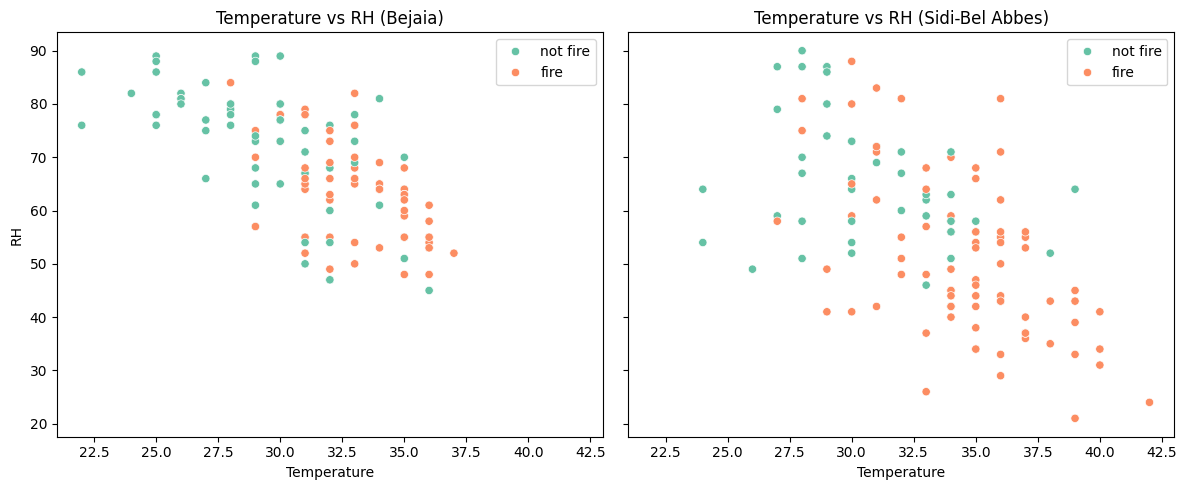

In [124]:
regions = df['Region'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(regions), figsize=(6*len(regions), 5), sharex=True, sharey=True)

for ax, region in zip(axes, regions):
    subset = df[df['Region'] == region]
    sns.scatterplot(data=subset, x='Temperature', y='RH', hue='Classes', palette='Set2', ax=ax)
    ax.set_title(f"Temperature vs RH ({region})")
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

## **Conclusion**
Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September